_La base des TDs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, __auteur Yury Kashnitsky__)_ 

# <center> TD 1. Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

## 1. Mise en pratique des principales méthodes de Pandas

**[Pandas](http://pandas.pydata.org)** est une bibliothèque Python qui fournit des moyens étendus pour l’analyse de données. Les Data scientistes travaillent souvent avec des données stockées dans des formats sous forme de table de données telles que `.csv`,` .tsv` ou `.xlsx`. Pandas est très pratique pour charger, traiter et analyser ces données tabulaires à l’aide de requêtes quasi-similaires aux requêtes de type SQL. En complément de `Matplotlib` et` Seaborn`, `Pandas` offre un large éventail d'opportunités d'analyse visuelle des données tabulaires.

Les pricipales structures de données dans `Pandas` sont implémentées avec les classes **Series** et **DataFrame**. Le premier est un tableau unidimensionnel indexé d'un type de données fixe. Le second est une structure de données bi-dimensionnelle - une table - dans laquelle chaque colonne contient des données du même type. Vous pouvez la voir comme un dictionnaire de plusieurs `Series`. Les `DataFrames` sont parfaits pour représenter des données réelles : les lignes correspondent aux instances (exemples, observations, individus etc.) et les colonnes correspondent aux caractéristiques de ces instances (variables).

Vous pouvez trouver tous les commandes utiles de Pandas dans le fichier "Pandas Cheat Sheet" (https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

# quelques imports pour mettre en place le cadre du graphique 
import matplotlib.pyplot as plt

# !pip install seaborn  #(pour installer la librairie seaborn via le notebook)
import seaborn as sns

# import de paramètres pour améliorer le rendu visuel
sns.set()
# Les graphiques au format Retina sont plus nets et plus lisibles
%config InlineBackend.figure_format = 'retina'

Nous allons tester les principales méthodes en analysant un jeu de données ou [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) sur le taux de désabonnement des clients d'opérateurs téléphoniques. Chargons les données (en utilisant la méthode `read_csv`), et jetons un coup d’œil aux 5 premières lignes en utilisant la méthode` head`:

In [2]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv"
df = pd.read_csv(url)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Rappelez-vous que chaque ligne correspond à un client, à une **instance** et les colonnes sont les **caractéristiques** de cette instance.

Examinons la dimensionnalité des données, les noms des caractéristiques et les types de caractéristiques.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`,` int64`, `float64` et` object` sont les types de données de nos caractéristiques. Nous voyons qu'une caractéristique est logique (`bool`), 3 caractéristiques sont de type ` objet`, et 16 caractéristiques sont numériques. Avec cette même méthode, nous pouvons facilement voir s’il manque des valeurs. Ici, il n'y en a pas car chaque colonne contient 3333 observations.

Nous pouvons **changer le type de colonne** avec la méthode `astype`. Appliquons cette méthode à la caractéristique `Churn` pour la convertir en` int64`:

In [4]:
df['Churn'] = df['Churn'].astype('int64')

La méthode `describe` affiche les caractéristiques statistiques de base de chaque caractéristique numérique (type ` int64` et `float64`): nombre de valeurs non manquantes, moyenne, écart-type, amplitude, médiane, (1er : 0,25) et (3ème : 0,75) quartiles.

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Afin de voir les statistiques des caractéristiques non numériques, il faut indiquer explicitement ces types de données dans le paramètre `include`.

In [6]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Pour les caractéristiques catégorielles (type `objet`) et booléennes (type` bool`), nous pouvons utiliser la méthode `value_counts`. Jetons un coup d'oeil à la distribution de `Churn` (la caractéristique cible pour cette base des données) :

In [7]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 utilisateurs sur 3333 sont clients *fidèles*; leur valeur `Churn` est 0. Pour calculer les pourcentages, passez ` normalize = True` à la fonction `value_counts`.

In [8]:
df['Churn'].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64

Ou avec la visualisation :

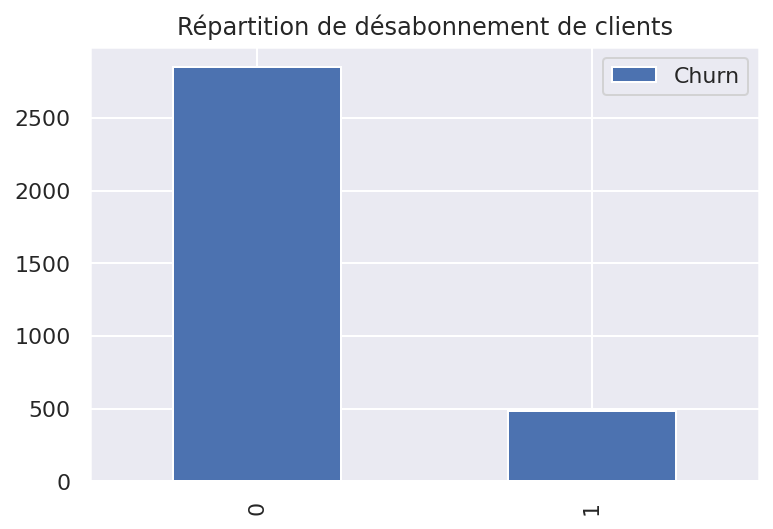

In [9]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Répartition de désabonnement de clients');

### Tri

Un `DataFrame` peut être trié selon la valeur de l’une des variables (colonnes). Par exemple, nous pouvons trier par *Total day charge*  
(utilisez `ascending = False` pour trier par ordre décroissant):

In [10]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Nous pouvons également trier sur plusieurs colonnes:

In [11]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexation et récupération de données

Un `DataFrame` peut être indexé de différentes manières.

Pour obtenir une seule colonne, vous pouvez saisir : `DataFrame['NomDeColonne'] `. Que nous utilisons pour répondre à une question à propos de cette colonne uniquement: **quelle est la proportion d'utilisateurs qui se sont désabonnés dans notre base de données?**

In [12]:
df['Churn'].mean()

0.14491449144914492

14,5% est en fait assez mauvais pour une entreprise; un tel taux de désabonnement peut entraîner la faillite de l'entreprise.

**L'indexation booléenne** avec une colonne est également très pratique. La syntaxe est `df[P(df['Nom']]]`, où `P` est une condition logique vérifiée pour chaque élément de la colonne ` NomDeColonne`. Le résultat de cette indexation est le `DataFrame` composé uniquement de lignes satisfaisant la condition ` P` de la colonne `NomDeColonne`.

Exemple d'utlisation pour répondre à la question:

**Quelles sont les valeurs moyennes des caractéristiques numériques pour les utilisateurs désabonnés, c'est-à-dire qui ont un Churn égal à 1 ?**

In [13]:
df[df['Churn'] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**Combien de temps (en moyenne) les utilisateurs désabonnés passent-ils au téléphone pendant la journée?**

In [14]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

**Quelle est la durée maximale des appels internationaux parmi les clients fidèles (`Churn == 0`) n'ayant pas de forfait international?**

In [15]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Les DataFrames peuvent être indexés par nom de colonne (étiquette) ou nom de ligne (index) ou par le numéro de série (indice) d'une ligne. La méthode `loc` est utilisée pour **l'indexation par nom**, tandis que` iloc() `est utilisée pour **l'indexation par numéro**.

Dans le premier cas ci-dessous, nous *"récupérons les valeurs des lignes d'index de 0 à 5 (inclus) et des colonnes étiquetées de  State à Area code (inclus)"*.  
Dans le second cas, nous *"récupérons les valeurs des cinq premières lignes des trois premières colonnes"* (comme dans un slicing avec Python : la valeur maximale n'est pas incluse).

In [16]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [17]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Si nous avons besoin de la première ou de la dernière ligne du dataframe, nous pouvons utiliser la syntaxe : `df[:1]` ou `df[-1:]`:

In [18]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Application de fonctions à des cellules, des colonnes et des lignes

**Pour appliquer des fonctions à chaque colonne, utilisez `apply ()`:**

In [19]:
df.apply(np.max) 

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

La méthode `apply` peut également être utilisée pour appliquer une fonction à chaque ligne. Pour ce faire, spécifiez `axis = 1`. Les fonctions Lambda sont très pratiques dans de tels scénarios. Par exemple, si nous devons sélectionner tous les _state_ commençant par 'W', nous pouvons le faire comme suit:

In [20]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


La méthode `map` peut être utilisée pour **remplacer des valeurs dans une colonne** en transmettant un dictionnaire de la forme` {ancienne_valeur: nouvelle_valeur} `comme argument:

In [21]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Presque la même chose peut être faite avec la méthode `replace`.

<details>

<p>
Il y a une petite différence.  
La méthode `replace` ne fera rien avec des valeurs qui ne se trouvent pas dans le dictionnaire de mappage,  
alors que `map` les changera en `NaN`).  
<br>    
    
```python
a_series = pd.Series(['a', 'b', 'c'])
a_series.replace({'a': 1, 'b': 1}) # 1, 2, c
a_series.map({'a': 1, 'b': 2}) # 1, 2, NaN
```
</p>
</details>

In [22]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Agrégation de données

En général, le regroupement des données dans Pandas fonctionne comme suit :


```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. Premièrement, la méthode `groupby` divise les colonnes`grouping_columns` par leurs valeurs. Ils deviennent un nouvel index dans le dataframe qui en  résulte.
2. Ensuite, les colonnes choisies sont sélectionnées (`columns_to_show`). Si `columns_to_show` n'est pas inclus, toutes les clauses non groupby seront incluses.
3. Enfin, une ou plusieurs fonctions sont appliquées aux groupes obtenus par colonnes sélectionnées.

Voici un exemple où nous regroupons les données en fonction des valeurs de la variable `Churn` et affichons les statistiques de trois colonnes dans chaque groupe :

In [23]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Faisons la même chose, mais légèrement différemment, en passant une liste de fonctions à `agg ()` (agrégateur) :

In [24]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Tableaux récapitulatifs

Supposons que nous voulions voir comment les observations de notre ensemble de données sont réparties dans le contexte de deux variables - `Churn` et`International plan`. Pour ce faire, nous pouvons construire un **tableau de contingence** en utilisant la méthode `crosstab`:

In [25]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [26]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Nous pouvons constater que la plupart des utilisateurs sont fidèles et n'utilisent pas de services supplémentaires (International Plan/Voice mail).

Cela ressemblera aux **tableaux croisés dynamiques** pour ceux qui connaissent Excel. Et, bien sûr, les tableaux croisés dynamiques sont implémentés dans Pandas: la méthode `pivot_table` prend les paramètres suivants:

* `values` - une liste de variables pour calculer des statistiques,  
* `index` - une liste de variables pour regrouper les données,
* `aggfunc` - quelles statistiques nous devons calculer pour les groupes, ex. somme, moyenne, maximum, minimum ou autre chose.

Examinons le nombre moyen d'appels de jour, de soir et de nuit par code régional (area code):

In [27]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Opérations de transformations d'un DataFrame

Comme beaucoup d'autres choses avec Pandas, l'ajout de colonnes à un DataFrame est réalisable de plusieurs manières.

Par exemple, si nous voulons calculer le nombre total d'appels pour tous les utilisateurs, créons la série `total_calls` et collons-la dans le DataFrame:

In [28]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# le paramètre loc est le nombre de colonnes après lequel l'objet Série doit être inséré
# nous l'initialisons à len(df.columns) pour le coller à la toute fin du dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Il est possible d’ajouter une colonne plus facilement sans créer d’instance Series intermédiaire:

In [29]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Pour supprimer des colonnes ou des lignes, utilisez la méthode `drop`, en passant les index requis et le paramètre` axis` (`1` si vous supprimez des colonnes et rien ou` 0` si vous supprimez des lignes). L'argument `inplace` indique s'il faut modifier le DataFrame d'origine. Avec `inplace = False`, la méthode` drop` ne modifie pas le DataFrame existant et en renvoie un nouveau avec des lignes ou des colonnes supprimées. Avec `inplace = True`, il modifie le DataFrame.

In [30]:
# supprimer les colonnes qui viennent d'être créées
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
# et voici comment supprimer des lignes
df.drop([1, 2]).head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Prévision du churn (taux d'attrition)

Voyons comment le taux de désabonnement est lié à la caractéristique ou variable *International plan*. Pour ce faire, nous utiliserons un tableau de contingence `` crosstab`` et également une analyse visuelle avec `Seaborn` (`sns`).

In [31]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


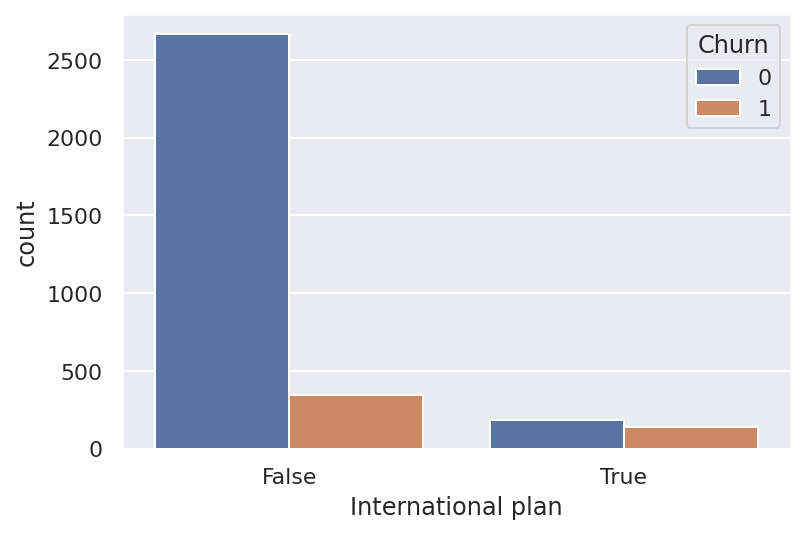

In [32]:
sns.countplot(x='International plan', hue='Churn', data=df);

Nous voyons qu'avec *International Plan*, le taux de désabonnement est beaucoup plus élevé, ce qui est une observation intéressante! Peut-être des dépenses importantes et mal contrôlées avec des appels internationaux sont-elles très sujettes aux conflits et suscitent l’insatisfaction des clients de l’opérateur de télécommunications.

Voyons ensuite une autre fonctionnalité importante - *Customer service calls*. Faisons également un tableau de synthèse et une image.

In [33]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


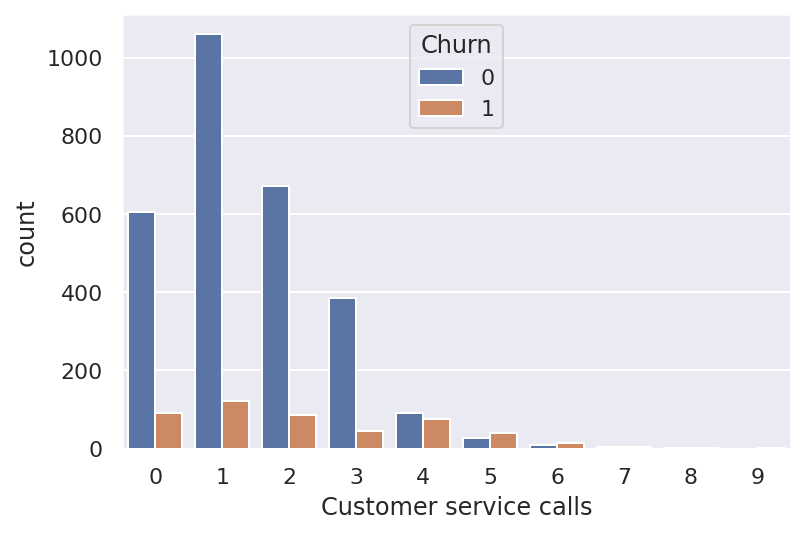

In [34]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Bien que ce ne soit pas évident dans le tableau récapitulatif, il ressort clairement du graphique ci-dessus que le taux de résiliation augmente fortement à partir de 4 appels de service après-vente.

Ajoutons maintenant une variable binaire à notre DataFrame - `Customer service calls > 3` (Appels du service client> 3). Et encore une fois, voyons comment cela se rapporte au désabonnement.

In [35]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


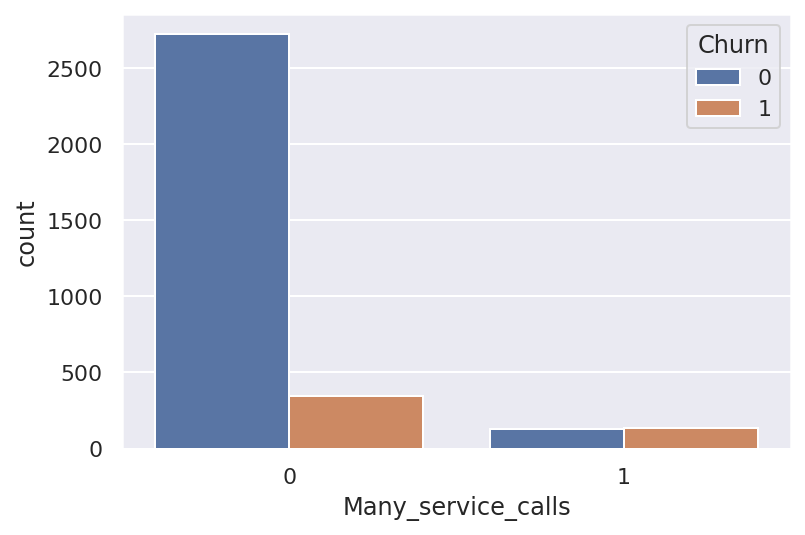

In [36]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Construisons une autre table de contingence qui relie *Churn* à la fois à *International plan* et à la variable nouvellement créée *Many_service_calls*.

In [37]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Par conséquent, si un nombre d'appels vers le centre de services est supérieur à 3 et que le *International Plan* est ajouté (et en prédisant Churn=0 sinon), on peut s’attendre à une précision de 85,8%. Ce nombre, 85,8%, que nous avons obtenu grâce à ce raisonnement très simple constitue un bon point de départ (*référence*) pour les autres modèles d’apprentissage automatique que nous allons construire.

Au cours de ce cours, rappelez-vous qu'avant l'avènement de l'apprentissage automatique, le processus d'analyse des données ressemblait à ce que nous venons de réaliser. Récapitulatif :
    
- La part des clients fidèles dans l'ensemble de données est de 85,5%. Le modèle le plus "simple" qui prédit toujours un "client fidèle" sur de telles données devinera juste dans environ 85,5% des cas. C'est-à-dire que la proportion de réponses correctes (*précision*) des modèles suivants ne devrait pas être inférieure à ce nombre et qu'elle devrait être nettement supérieure;
- A l’aide d’une simple prévision pouvant être exprimée par la formule suivante: `International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0`, on peut s’attendre à un taux de prédiction de 85,8%, qui est juste au-dessus de 85,5%. Ensuite, nous parlerons des arbres de décision et découvrirons comment trouver de telles règles **automatiquement** uniquement sur la base des données d’entrée;
- Nous avons obtenu ces deux bases sans appliquer l’apprentissage automatique et elles serviront de point de départ pour nos modèles ultérieurs. S'il s'avère qu'avec un effort énorme, nous n'augmentons la précision que de 0,5%, alors nous avons peut-être commis une erreur, et il suffit de nous en tenir à un simple modèle "if-else" avec deux conditions;
- Avant de former des modèles complexes, il est recommandé de mélanger un peu les données, de tracer des graphiques et de vérifier des hypothèses simples. De plus, dans les applications métier de l'apprentissage automatique, on commence généralement par des solutions simples, pour ensuite expérimenter des solutions plus complexes.

## 3. Plus d'analyse visuelle

### Histogrammes et diagrammes de densité

La façon la plus simple d'examiner la distribution d'une variable numérique est de tracer son *histogramme* à l'aide de la méthode de `DataFrame` [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

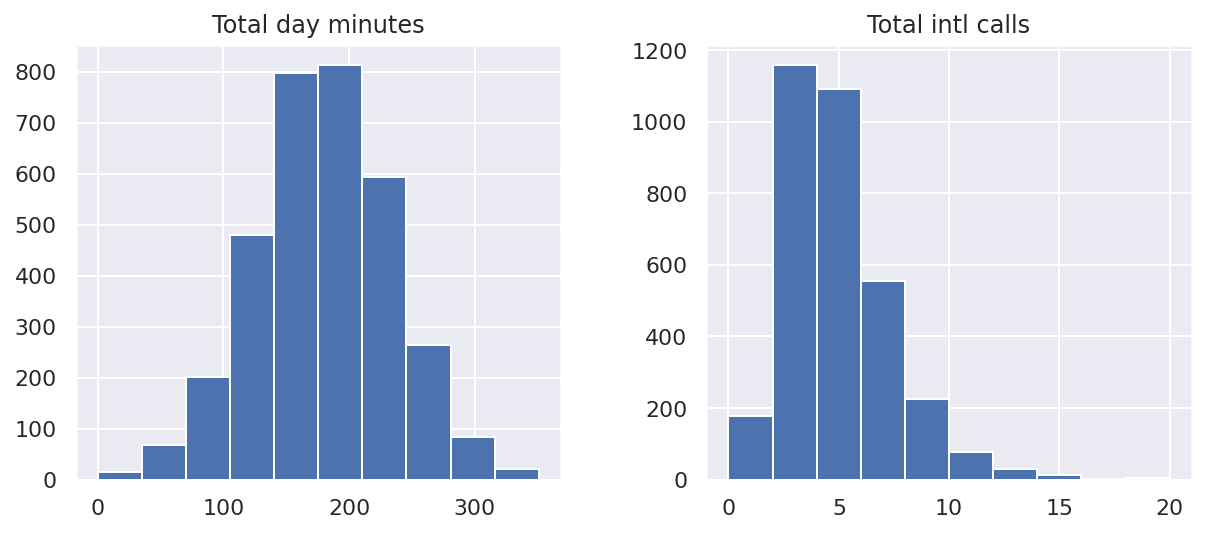

In [38]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

Il existe également un autre moyen, souvent plus clair, de saisir la distribution: *diagrammes de densité* ou, plus officiellement, *diagrammes de densité de noyau*. Ils peuvent être considérés comme une version [lissée](https://en.wikipedia.org/wiki/Kernel_smoother) de l'histogramme. Leur principal avantage sur ces derniers est qu'ils ne dépendent pas de la taille des "_bins_". Créons des tracés de densité pour les deux mêmes variables:

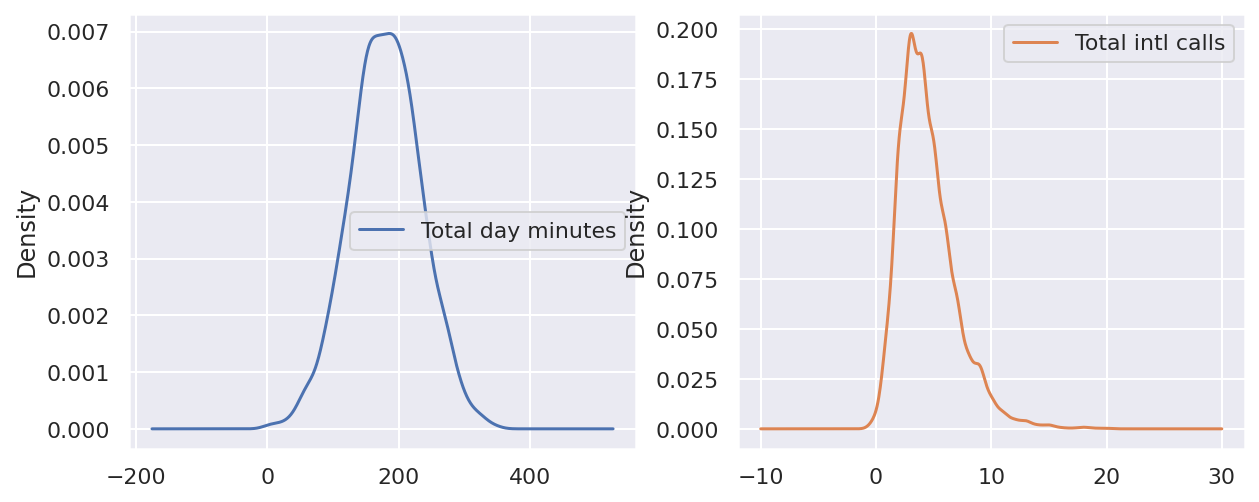

In [39]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

Il est également possible de tracer une distribution des observations avec la méthode [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html) de de `seaborn`. Par exemple, regardons la distribution de `Total day minutes`. Par défaut, le tracé affiche à la fois l'histogramme avec [l'estimation de la densité du noyau](https://en.wikipedia.org/wiki/Kernel_estimation_de_la_densité_) (KDE) en haut.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


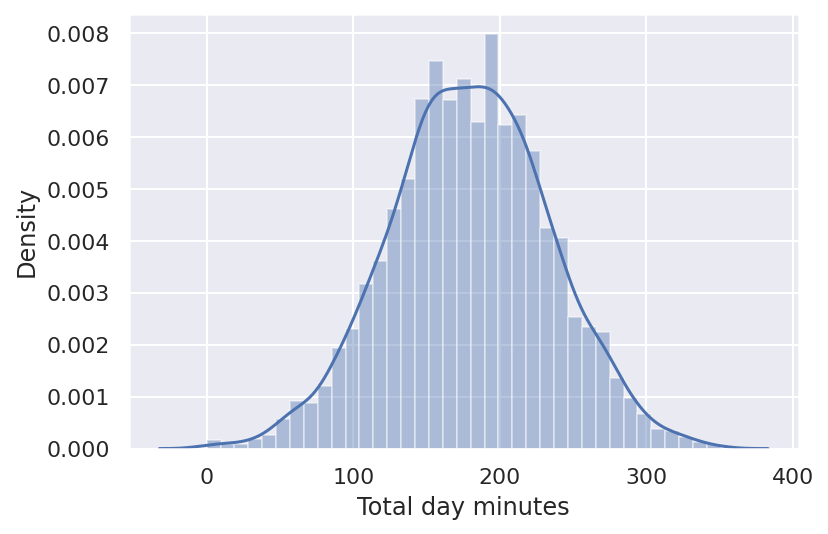

In [40]:
sns.distplot(df['Total day minutes']);

### Box plot (Boîte à moustaches)

Un autre type de visualisation utile est un *box plot*. `seaborn` fait un excellent travail ici:

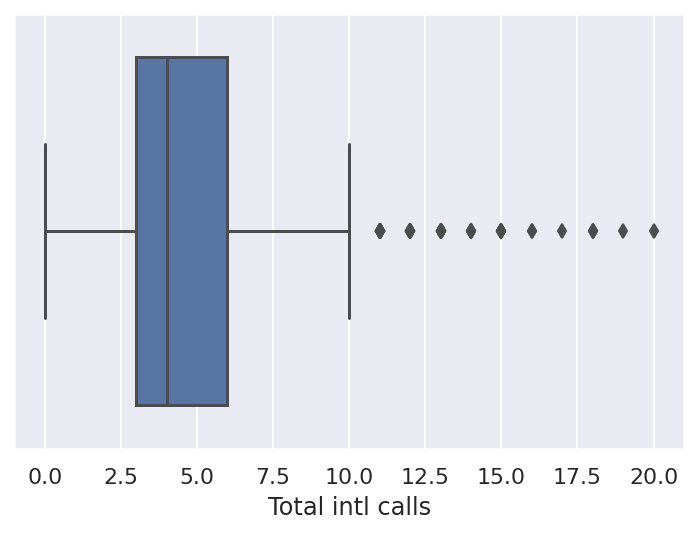

In [41]:
sns.boxplot(x='Total intl calls', data=df);

### Graphique en barres (Bar plot)

Le diagramme à barres est une représentation graphique de la table des fréquences. La façon la plus simple de le créer est d'utiliser la fonction de `seaborn`[`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). Il existe une autre fonction dans «seaborn» qui est quelque peu confondue [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) et est principalement utilisée pour la représentation de certaines statistiques de base d'une variable numérique groupée par une caractéristique catégorielle.

Tracons les distributions de deux variables catégorielles:

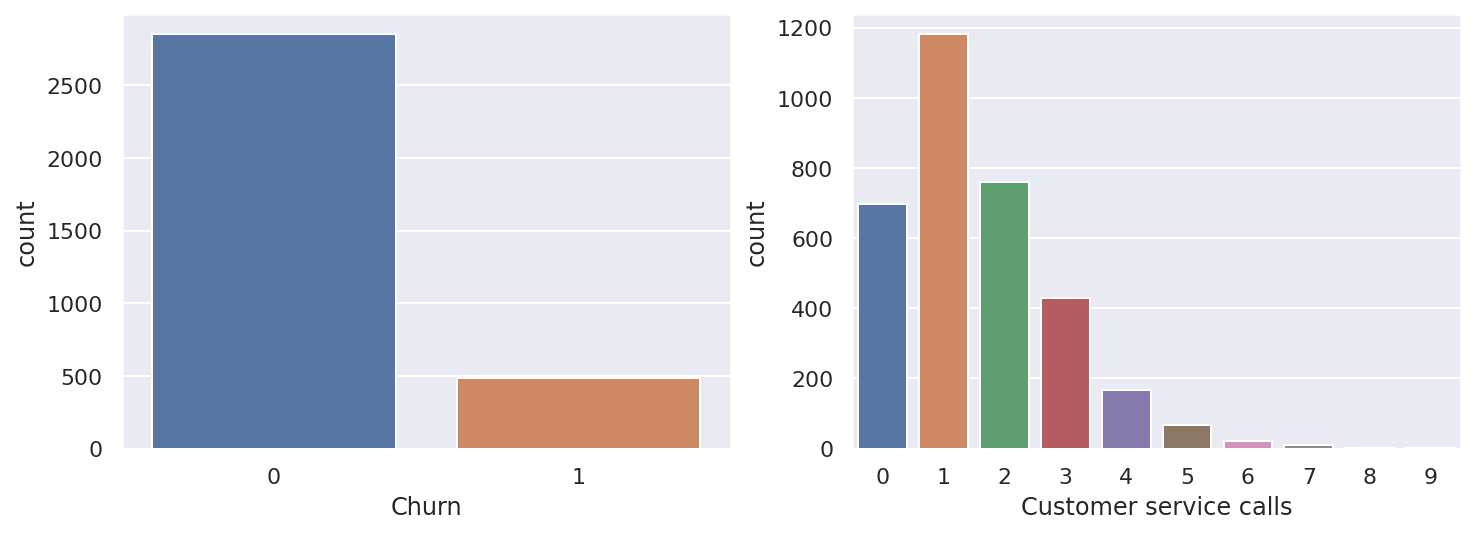

In [42]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

### Matrice de corrélation

Examinons les corrélations entre les variables numériques de notre ensemble de données. Ces informations sont importantes à connaître car il existe des algorithmes d'apprentissage automatique (par exemple, régression linéaire et logistique) qui ne gèrent pas bien les variables d'entrée hautement corrélées.

Tout d'abord, nous utiliserons la méthode [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) sur un `DataFrame` qui calcule la corrélation entre chaque paire de caratéristiques. Ensuite, nous passons la *matrice de corrélation* résultante à [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de `seaborn`, qui rend une une matrice à code couleur pour les valeurs fournies:

In [43]:
## Correletion map avancé
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize =(24,20))
    cmap = sns.diverging_palette(220,10, as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={'shrink' : .9}, 
        ax=ax, 
        annot = True, 
        annot_kws = {'fontsize' : 12}
    )

In [44]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

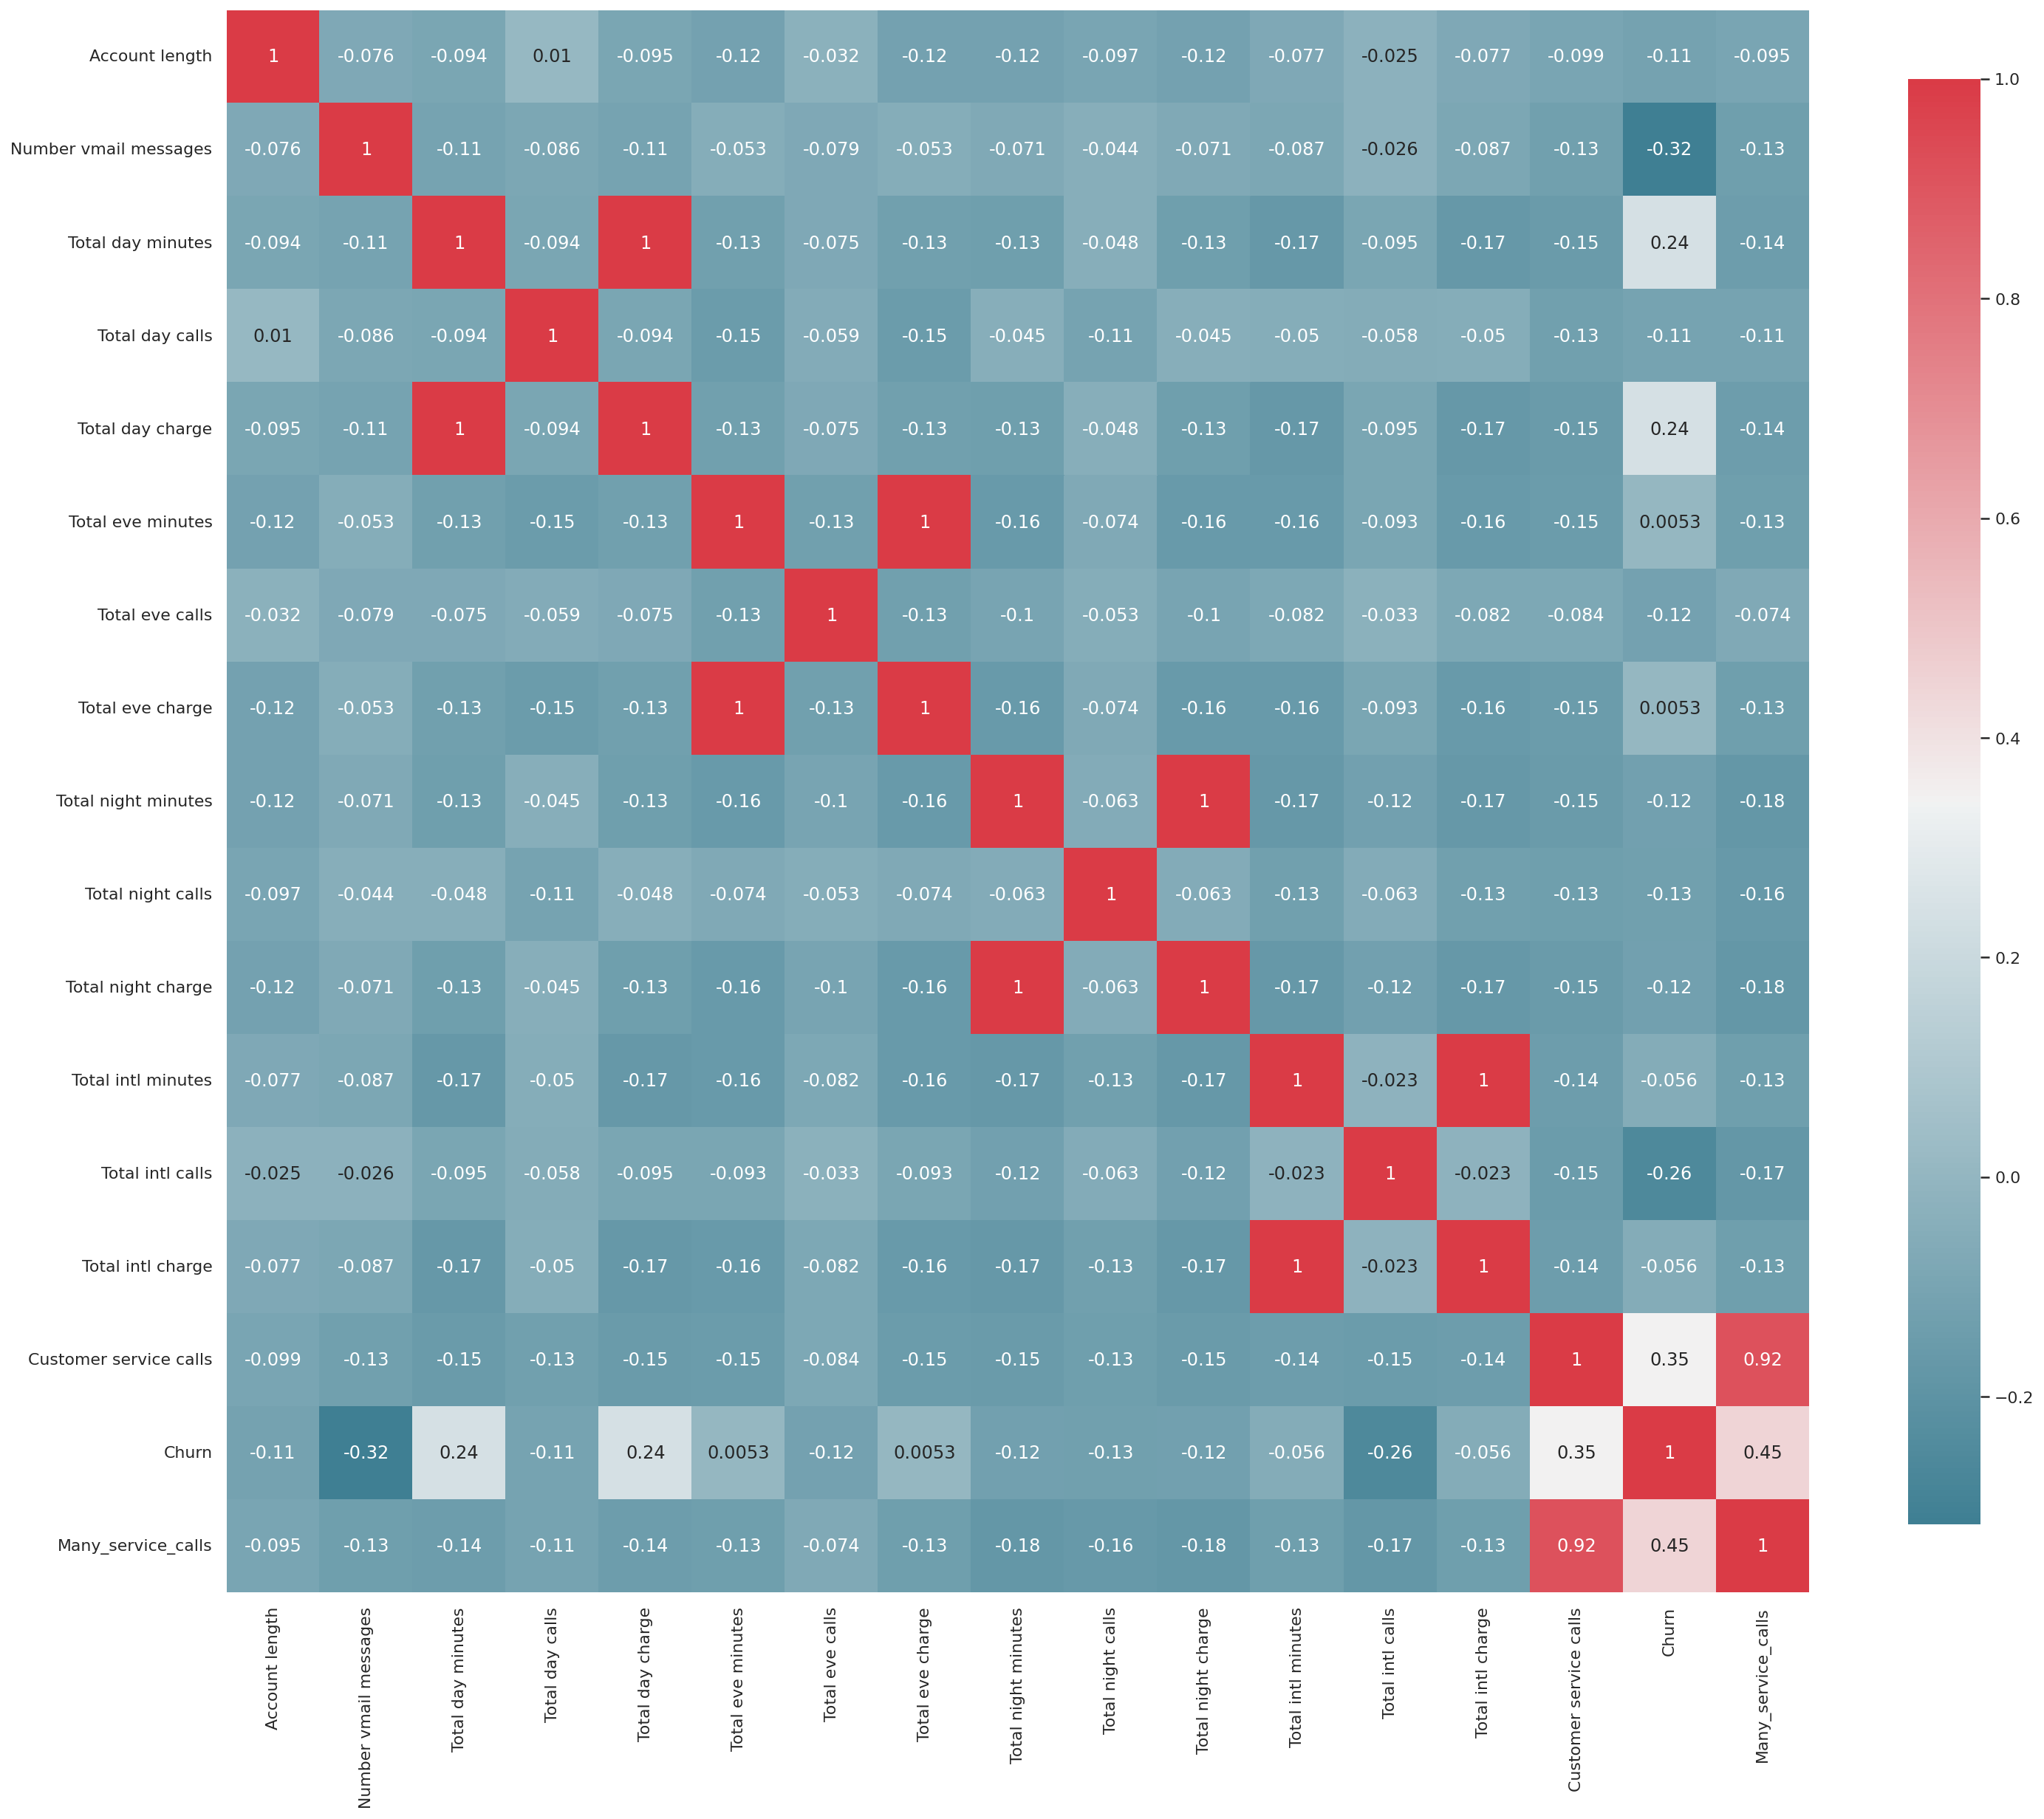

In [45]:
plot_correlation_map(corr_matrix)

À partir de la matrice de corrélation colorée générée ci-dessus, nous pouvons voir qu'il y a 4 variables telles que *Total day charge* qui ont été calculées directement à partir du nombre de minutes passées sur les appels téléphoniques (*Total day minutes*). Celles-ci sont appelées variables *dépendantes* et peuvent donc être omises car elles ne fournissent aucune information supplémentaire. 

### Nuage de points / Diagramme de dispersion (Scatter plot)

Le *nuage de points* affiche les valeurs de deux variables numériques en tant que *coordonnées cartésiennes* dans l'espace 2D. Des diagrammes de dispersion en 3D sont également possibles.

Essayons la fonction [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) de la bibliothèque `matplotlib`:

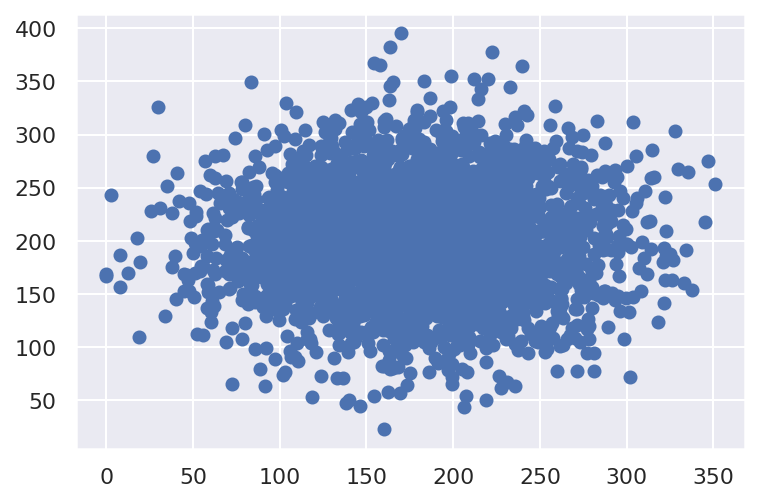

In [46]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

Nous obtenons une image sans intérêt de deux variables normalement distribuées. De plus, il semble que ces caractéristiques ne soient pas corrélées car la forme semblable à une ellipse est alignée avec les axes.

Il existe une option légèrement plus sophistiquée pour créer un nuage de points avec la bibliothèque `seaborn`:

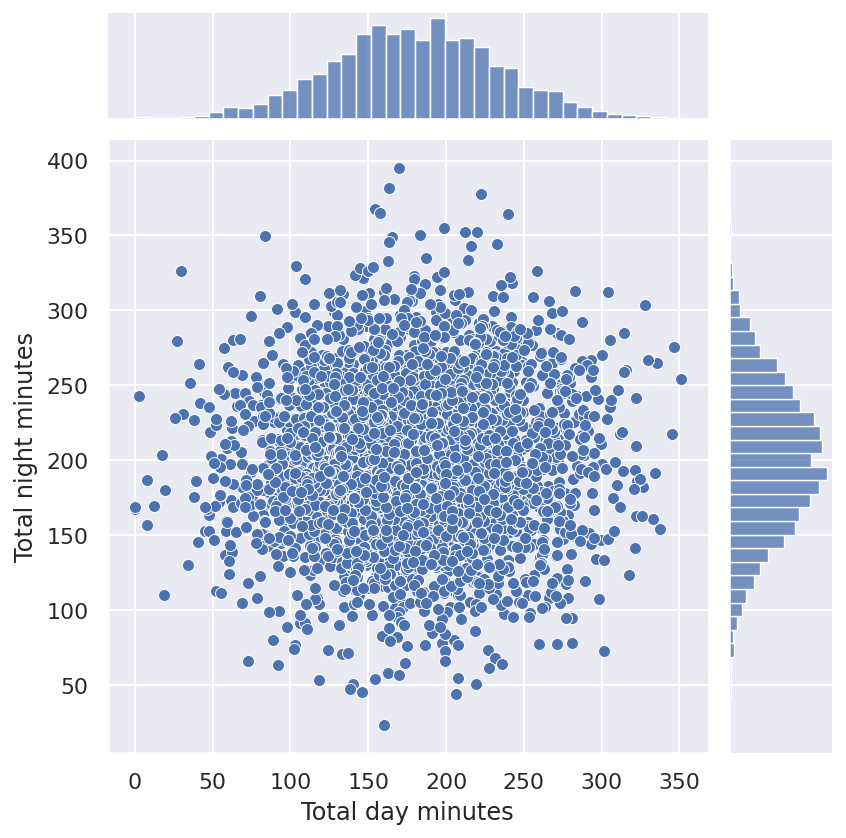

In [47]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

#### Matrice de nuage de points (Scatterplot matrix)

Dans certains cas, nous pouvons vouloir tracer une *matrice de nuage de points* telle que celle illustrée ci-dessous. Sa diagonale contient les distributions des variables correspondantes et les diagrammes de dispersion pour chaque paire de variables remplissent le reste de la matrice.

In [48]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

In [49]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[features]);

Output hidden; open in https://colab.research.google.com to view.

De plus, les points peuvent être codés par couleur ou par taille afin que les valeurs d'une troisième variable catégorielle soient également présentées dans la même figure. On utilise le paramètre «hue» pour indiquer notre caractéristique d'intérêt:

In [50]:
sns.pairplot(df[features + ['Churn']], hue='Churn')

Output hidden; open in https://colab.research.google.com to view.